<h1> Notebook 1 - Regresión Lineal</h1>

<p> En este notebook, vamos a implementar un método utilizando el algoritmo de <b>regresión lineal</b> en Python. El objetivo es poder describir este algoritmo y poder re-utilizarlo para resolver problemas de clasificación simple.</p> 

<h2> 1. Definición </h2>
<p> El algoritmo de <b>regresión lineal</b> es un algortimo de aprendizaje supervisado, de tipo <b>regresión</b>. Los algoritmos de regresión permiten de predecir <b> variables <u>continuas</u></b> a partir de una variable (este caso, hablamos de regresión lineal simple) o varias variables (regresión lineal múltiple).</p>

<p>Por ejemplo, predecir el precio de una casa según la superficie de la casa, su ubicación y/o el tipo de material utilizado, es típicamente un problema de regresión.</p>
    
<p> En otros terminos, la <b>regresión lineal</b> consiste en encontrar una recta, un plano o un hiperplano que aproxima la distribución de un conjunto de puntos. Detallamos esta idea a continuación con ejemplos e implementación en Python. </p>

<h2> 2. Implementación de una Regresión Lineal simple </h2>

<p>Consideremos el <b>problema siguiente</b>:</p>
<p>Usted es el jefe de una empresa de <i>FoodTrucks</i> y busca una nueva ciudad dónde implementar un nuevo punto de venta. Su empresa ya tiene camiones en distintas ciudades y tiene a su disposición los datos indicandos el beneficio realizado en cada ciudad. Usted desea utilizar estos datos para estimar qué beneficio van a realizar según la ciudad escogida.</p>

<p> Este problema es de tipo <b>supervisado</b> porque conocemos cuál es el tipo de variable que queremos predecir:</p>
 - Y: la variable que queremos predecir (<i>volumen de negocio</i>),<br>
 - X: la variable explicativa (<i>tamaño de la ciudad</i>)

In [1]:
#Nuestros datos son al formato CSV y tienen 2 columnas: la populación de la ciudad (por 10000 personas) 
#y el beneficio realizado por la empresa en este ciudad
import pandas as pd
df = pd.read_csv("nb1-dataset1.csv")
df

,Population (10000 pers.),Beneficio (10K$)
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [2]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = df.iloc[0:len(df),0]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
Y = df.iloc[0:len(df),1] 

In [3]:
#Visualización de los datos
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

<Figure size 640x480 with 1 Axes>

Para aprender un modelo predictivo basado en una regresión lineal, vamos a utilizar la librería Python ScyPy (una librería python open-source para las matemáticas: <a href="https://www.scipy.org/">SciPy</a>).

In [4]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

<b>Preguntas</b>: 
- ¿Qué hizó la función 'linregress'? <br>
- ¿A qué corresponden las variables 'slope' e 'intercept'? <br>
- ¿A qué corresponden las otras variables?

linregress: calcula una regresión lineal de mínimos cuadrados para dos conjuntos de mediciones, en este caso X e Y <br>
slope: pendiente de la línea de regresión <br>
intercept: intersección de la línea de regresión <br>
r_value: coeficiente de correlación <br>
p_value: valor p de dos lados para una prueba de hipótesis cuya hipótesis nula es que la pendiente es cero, usando 
la prueba de Wald con la distribución t de la estadística de prueba

In [5]:
#Definemos una función que predice 'y' (variable de output), a partir de 'x' (variable de input)  
def predict(x):
   return slope * x + intercept

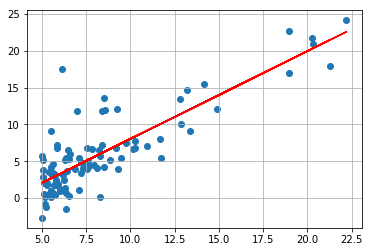

In [6]:
#Visualizemos el modelo aprendido por el algoritmo de Regresión Lineal
fitLine = predict(X)
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.show()

<p>Según este modelo, ¿cuál sería el beneficio esperado si la ciudad en la cual pensamos instalar un <a>FoodTruck</a> tiene 127.000 habitantes?</p> (pueden utilizar la función "predict()" que definimos anteriormente).

In [7]:
predict(127000)

151511.37703120004

In [8]:
#print(...)

<b>Preguntas</b>:
    - ¿Cómo saber qué tan correcto es nuestro modelo? 
    - ¿Qué deberiamos hacer para medir la calidad predictiva de nuestro modelo?

Particionando nuestro set de datos y entrenandolos, luego comparar su error y si es pequeño o va disminullendo nuestro modelo es bueno. <br> 
Medir el margen de error que tiene con los datos reales

<h2> 3. Regresión lineal múltiple </h2>

En general, no es siempre posible predecir una variable a partir de una sola variable explicativa. A menudo, se necesita varias variables. En este caso, hablamos de <i>Multivariate Regresion</i>.

<b>Problema</b>:
<p>Supongamos que usted quiere vender su casa y buscar cuál podría ser un buen precio para venderla. Tienen a su disposición un dataset que indica el precio de venta de varias casas de su región y de 2 otras variables:</p>
- la superficie de la casa, <br>
- el número de habitaciones.

In [9]:
import pandas as pd
df2 = pd.read_csv("nb1-dataset2.csv")
print(df2.head())

   Superficie  Numero_habitaciones  Precio
0        2104                    3  399900
1        1600                    3  329900
2        2400                    3  369000
3        1416                    2  232000
4        3000                    4  539900


Luego, tenemos que diferenciar las variables predictivas X (Superficie, Numero de habitaciones) y la variable objetivo Y (Precio).

In [10]:
# Variable objetivo
Y = df2["Precio"]
# Variables predictivas (o explicativas)
X = df2[['Superficie','Numero_habitaciones']]

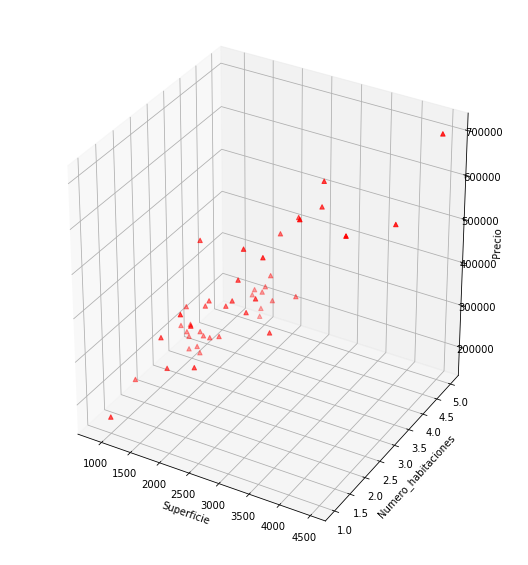

In [11]:
#Visualizemos los datos en un espacio en 3 dimensiones
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df2["Superficie"], df2["Numero_habitaciones"], df2["Precio"], c='r', marker='^')
 
ax.set_xlabel('Superficie')
ax.set_ylabel('Numero_habitaciones')
ax.set_zlabel('Precio')
 
plt.show()

Para poder utilizar el algoritmo Multivariate Regresion, es necesario realizar una etapa de normalización de las variables, para darles un valor entre -1 y 1. La librería Python Scikit-learn permite realizar este proceso.

In [12]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['Superficie', 'Numero_habitaciones']].as_matrix())

/home/mariajose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Entre los algoritmos de Regresión Múltiples, existe el método <i>Ordinary Least Squares</i> (OLS). OLS es un método de optimización que busca minimizar la suma de las diferencias observadas entre las predicciones del modelo y los datos de entrenamiento. Con el paquete 'statsmodels', se puede entrenar un modelo OLS y obtener un resumen del modelo:

In [13]:
import statsmodels.api as sm

est = sm.OLS(Y, X_scaled).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.104
Date:                Tue, 28 Aug 2018   Prob (F-statistic):              0.134
Time:                        12:08:06   Log-Likelihood:                -666.19
No. Observations:                  47   AIC:                             1336.
Df Residuals:                      45   BIC:                             1340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.094e+05   6.23e+04      1.756      0.0

La variable 'coef' nos indica cuál es el factor de ponderación de cada variable predictiva. Podemos entonces construir nuestra funcion de predicción:

In [14]:
def predict_price_of_house(Superficie, Numero_habitaciones):
    return 1.094e+05 * Superficie + -6578.3549 * Numero_habitaciones

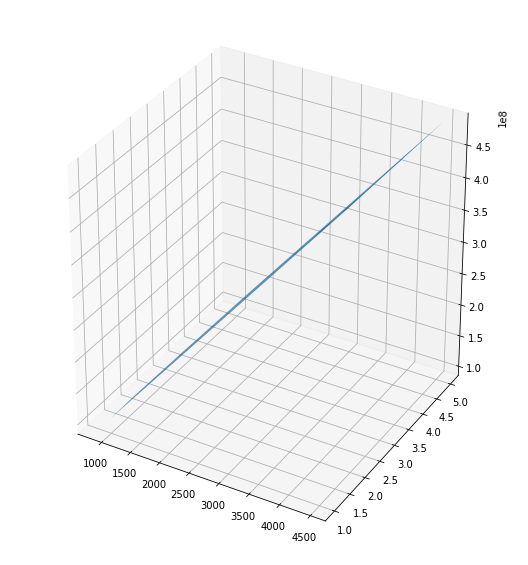

In [15]:
#Visualización del modelo obtenido

import matplotlib.pyplot as plt

def predict_all(lst_sizes, lst_nb_rooms):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_rooms[n]))
    return predicted_prices

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
 
ax.plot_trisurf(df2["Superficie"], df2["Numero_habitaciones"], predict_all(df2["Superficie"], df2["Numero_habitaciones"]))
                   
plt.show()


In [16]:
print(predict_price_of_house(4500,5))

492267108.2255


<b>Preguntas:</b>
- ¿Cuál es el principal limite de los modelos predictivos lineales?
- ¿Qué es la Regresión Polinomial? ¿La Regresión Lineal es una Regresión Polinomial?

La regresión polinomial es una forma de regresión lineal en la que la relación entre la variable independiente x y la variable dependiente y es modelada como un polinomio de grado n en x. <br>
No sirve para los datos que por su naturaleza no son lineales, la normalizacion sirve para bajar la varianza cuando los datos tienen rangos muy diferentes.

<h2> 3. Trabajo práctico </h2>

<b>Problema</b>: 
    
<p>Tenemos a disposición un dataset con 1338 observaciones (filas) y 7 características (columnas): edad, genero, bmi (body mass index), número de niños, si es fumadora o no, su región y sus gastos en salud.</p>

<b>Pregunta</b>:
- Entrenar un modelo predictivo que estima los gastos de salud de un hombre de 55 años, sin niño, teniendo un bmi de 42.6, fumador.
- Desde un punto de vista del emprendimiento, ¿qué podría ser el valor añadido de este tipo de modelo predictivo? a quién podría servir?
- Desde un punto de vista científico y ético, ¿qué críticas podría emitir?



In [17]:
import pandas as pd
df3 = pd.read_csv("nb1-insurance.csv")
print(df3.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [18]:
df3.replace({'sex': {'female': 0, 'male': 1}},  inplace = True)
df3.replace({'smoker': {'yes': 1, 'no': 0}},  inplace = True)
df3.replace({'region': {'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}},  inplace = True)

In [19]:
scale = StandardScaler()
# Variable objetivo
Y = df3["expenses"]
# Variables predictivas (o explicativas)
X = df3[['age','sex','bmi','children','smoker']]
X_scaled = scale.fit_transform(X.as_matrix())

/home/mariajose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [20]:
est = sm.OLS(Y, X_scaled).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 28 Aug 2018   Prob (F-statistic):          8.13e-118
Time:                        12:08:07   Log-Likelihood:                -14727.
No. Observations:                1338   AIC:                         2.946e+04
Df Residuals:                    1333   BIC:                         2.949e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3619.5908    402.544      8.992      0.0

In [21]:
def predict_expences(age, sex, bmi, children,smoker):
    return 3619.5908 * age + -64.3371 * sex + 1965.6982 * bmi + 571.9154 * children + 9613.3311 * smoker

In [22]:
prueba = pd.DataFrame({
   'age':55,
   'sex':1,
   'bmi':42.6,
   'children': 0,
   'smoker':1
},index=[0])
prueba_scaled = scale.transform(prueba)

print(predict_expences(prueba_scaled[0][0],prueba_scaled[0][1],prueba_scaled[0][2],prueba_scaled[0][3],prueba_scaled[0][4]))

26279.04474883646


Lo que aprende el algoritmo de regresion lineal es los coheficiente de la pendiente y el intercepto de la recta, para predecir.